In [1]:
from functions import *

# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is first applied for different polynomial degree, for a given number of data points. This is done to evalute how model complexity affects the results.
* Then, for a given polynomial degree, we see how the results may depend on number of data points.
* Uses sklearn functionalities to make the model and assess the MSE and R^2 score.

### Checking the dependence on polynomial degree

In [2]:
n = 2000  # Number of data points

p_vals = np.arange(2, 100, 5)  # Array of various polynomial degrees

In [3]:
def OLS_various_poly_deg(n, p_vals):
    results = []

    train, test, full = make_data(n)  # making a dataset with size n
    x_train, y_train = train  # training data
    x_test, y_test = test  # test data
    x_all, y_all, y_all_clean = full  # full data

    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    x_all = x_all.reshape(-1, 1)

    # making an OLS model for a given polynomial degree, p
    for p in p_vals:
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        LinearRegression(fit_intercept=False)
        )
        
        # using the training data to train the model
        model.fit(x_train, y_train)

        # using the test data to make a prediction, unsee data for the model
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)
        
        # assessing the model with scores
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)


        # extracting the model features
        theta = model.named_steps['linearregression'].coef_
        
        # saving the results in a pandas dataframe
        results.append({
            'p': p,
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_OLS = pd.DataFrame(results)

    return df_OLS

In [4]:
def plot_OLS_results(df_OLS, p):
    """
    Plot the OLS results for a specific number of datapoints 'n' and polynomial degree `p`.
    """
    row = df_OLS[(df_OLS['p'] == p)].iloc[0]

    x_train = row['x_train']
    y_train = row['y_train']
    x_test = row['x_test']
    y_test = row['y_test']
    y_pred_test = row['y_pred_test']
    y_pred_train = row['y_pred_train']

    plt.figure(figsize=(8, 5))

    # Plot training data
    plt.scatter(x_train, y_train, s=6, label='Training data')

    # Plot test data
    plt.scatter(x_test, y_test, s=6, label='Test data')

    # Plot model prediction on test data
    plt.scatter(x_test, y_pred_test, s=6, label='Predicted (test)')

    # Plot model prediction on test data
    plt.scatter(x_train, y_pred_train, s=6, label='Predicted (train)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'OLS Polynomial Regression (n={n}, p={p})')
    plt.legend()
    plt.show()

In [5]:
df_OLS_degs = OLS_various_poly_deg(n, p_vals)

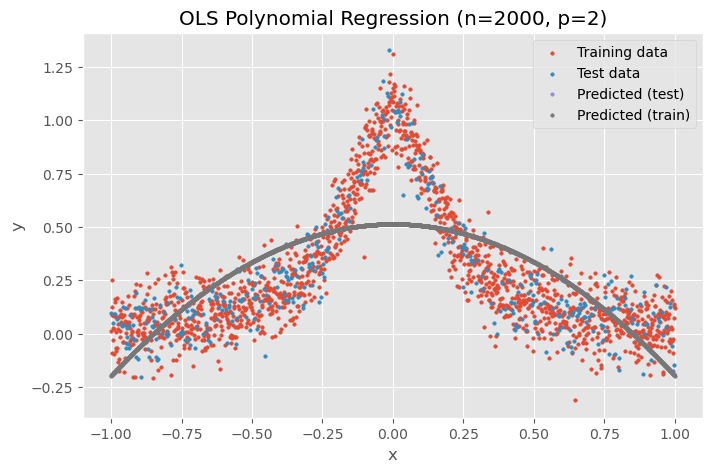

In [6]:
plot_OLS_results(df_OLS_degs, p_vals[0])

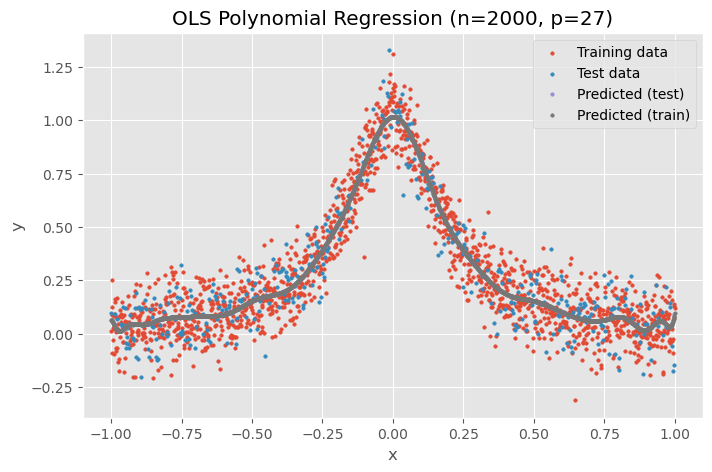

In [34]:
plot_OLS_results(df_OLS_degs, p_vals[5])

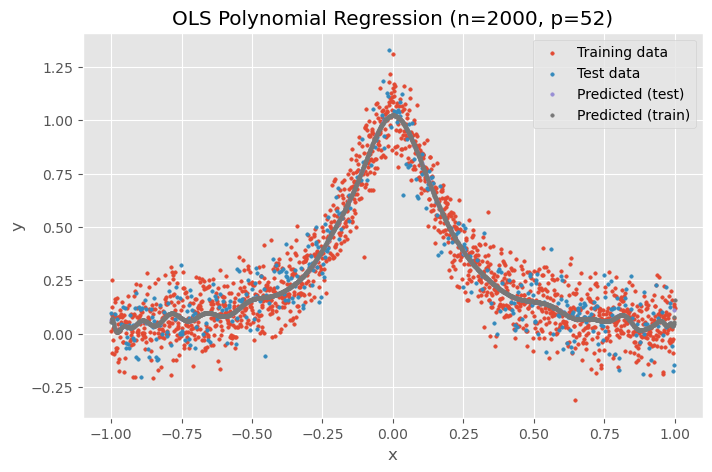

In [35]:
plot_OLS_results(df_OLS_degs, p_vals[10])

### Checking the dependence on number of data points

In [8]:
def OLS_various_n_data(p, n_vals):
    results = []

    for n in n_vals:
        train, test, full = make_data(n)  # making a dataset with size n
        x_train, y_train = train  # training data
        x_test, y_test = test  # test data
        x_all, y_all, y_all_clean = full  # actual data

        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)
        x_all = x_all.reshape(-1, 1)

        # making an OLS model for a given polynomial degree, p
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        LinearRegression(fit_intercept=False)
        )
        
        # using the training data to train the model
        model.fit(x_train, y_train)

        # using the test data to make a prediction, unsee data for the model
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)
        
        # assessing the model with scores
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)


        # extracting the model features
        theta = model.named_steps['linearregression'].coef_
        
        # saving the results in a pandas dataframe
        results.append({
            'n': n,
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_OLS = pd.DataFrame(results)

    return df_OLS

In [9]:
p = 20

In [ ]:
n_vals = np.arange(10, 100, 10)
df_OLS_n_low = OLS_various_n_data(p, n_vals)

In [ ]:
n_vals = np.arange(200, 5000, 50)
df_OLS_n_high = OLS_various_n_data(p, n_vals)

Text(0.5, 0.98, 'OLS \n Polynomial degree = 20')

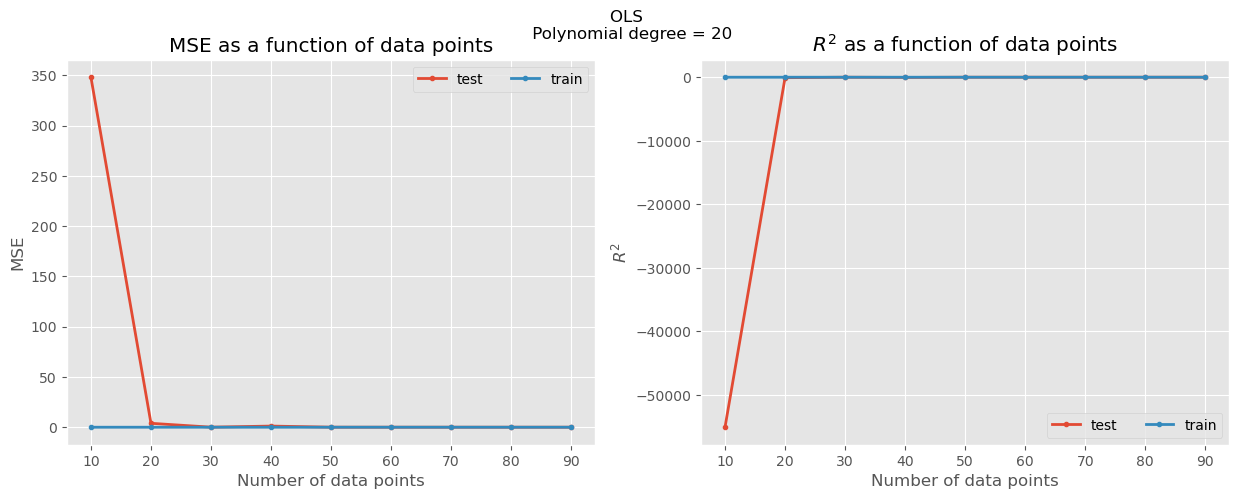

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_n_low['n'], df_OLS_n_low['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_OLS_n_low['n'], df_OLS_n_low['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')

ax[0].set_title('MSE as a function of data points')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Number of data points')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_n_low['n'], df_OLS_n_low['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_OLS_n_low['n'], df_OLS_n_low['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of data points')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Number of data points')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'OLS \n Polynomial degree = {p}')

Text(0.5, 0.98, 'OLS \n Polynomial degree = 20')

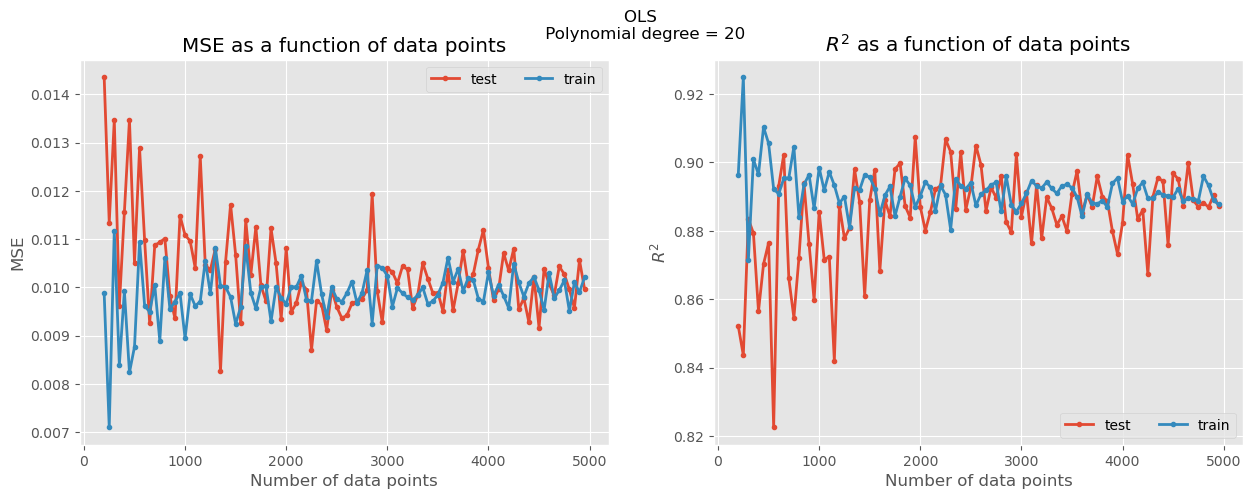

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_n_high['n'], df_OLS_n_high['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_OLS_n_high['n'], df_OLS_n_high['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')


ax[0].set_title('MSE as a function of data points')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Number of data points')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_n_high['n'], df_OLS_n_high['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_OLS_n_high['n'], df_OLS_n_high['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of data points')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Number of data points')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'OLS \n Polynomial degree = {p}')

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* The method is first applied for a set number of data points and a polynomial degree, but for different values of the hyperparameter $\lambda$.
* Secodnly, the method is applied to a set number of data points, with a set value of the hyperparameter, but for various polynomial degrees.
* Uses sklearn functionalities to make the model and assess the MSE and R^2 score.

### Checking the dependence on the hyperparameter/penalization term

In [16]:
n = 2000
p = 20

lambdas = np.logspace(-8, 1, 15)

In [17]:
def Ridge_various_lambda(n, p, lambdas):
    
    results = []

    train, test, full = make_data(n)  # making a dataset with size n
    x_train, y_train = train
    x_test, y_test = test
    x_all, y_all, y_all_clean = full

    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    x_all = x_all.reshape(-1, 1)


    for l in lambdas:
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        Ridge(alpha=l, fit_intercept=False)
        )
        
        model.fit(x_train, y_train)
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)

        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)

        theta = model.named_steps['ridge'].coef_

        results.append({
            'lambda': l, 
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_Ridge = pd.DataFrame(results)
    return df_Ridge

In [18]:
def plot_Ridge_results(df_Ridge, l):
    """
    Plot the Ridge results for a specific number of datapoints 'n' and polynomial degree `p`.
    """
    row = df_Ridge[(df_Ridge['lambda'] == l)].iloc[0]

    x_train = row['x_train']
    y_train = row['y_train']
    x_test = row['x_test']
    y_test = row['y_test']
    y_pred_test = row['y_pred_test']
    y_pred_train = row['y_pred_train']

    plt.figure(figsize=(8, 5))

    # Plot training data
    plt.scatter(x_train, y_train, s=6, label='Training data')

    # Plot test data
    plt.scatter(x_test, y_test, s=6, label='Test data')

    # Plot model prediction on test data
    plt.scatter(x_test, y_pred_test, s=6, label='Predicted (test)')

    # Plot model prediction on test data
    plt.scatter(x_train, y_pred_train, s=6, label='Predicted (train)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(rf'Ridge Polynomial Regression \\ n={n}, p={p}, $\lambda$ ={l}')
    plt.legend()
    plt.show()

In [19]:
df_Ridge_lambdas = Ridge_various_lambda(n, p, lambdas)

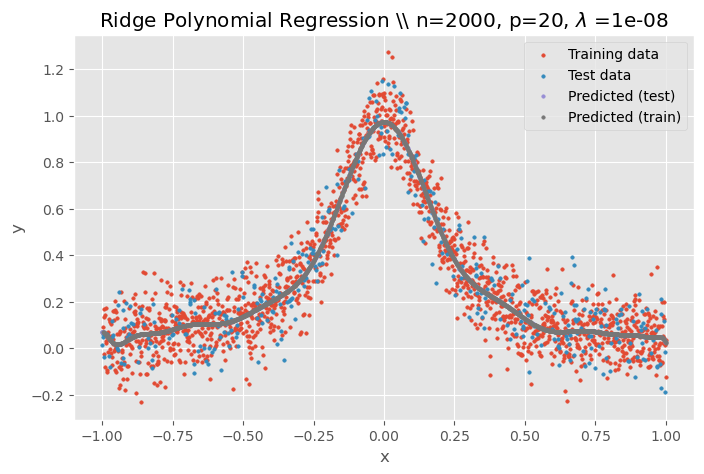

In [20]:
plot_Ridge_results(df_Ridge_lambdas, lambdas[0])

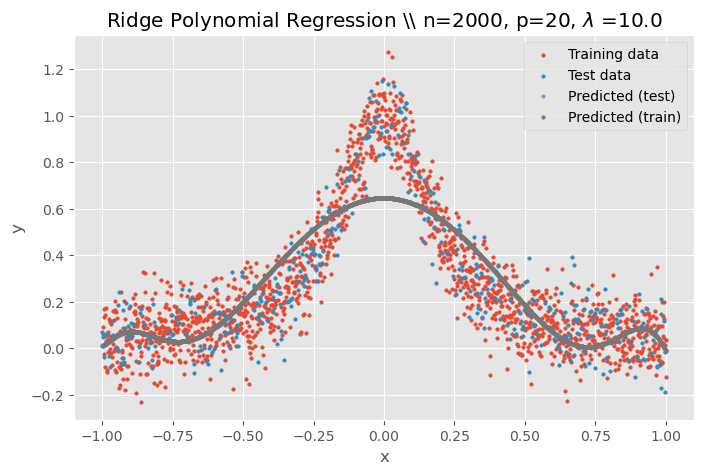

In [21]:
plot_Ridge_results(df_Ridge_lambdas, lambdas[-1])

Text(0.5, 0.98, 'Ridge \n n = 2000, p = 20')

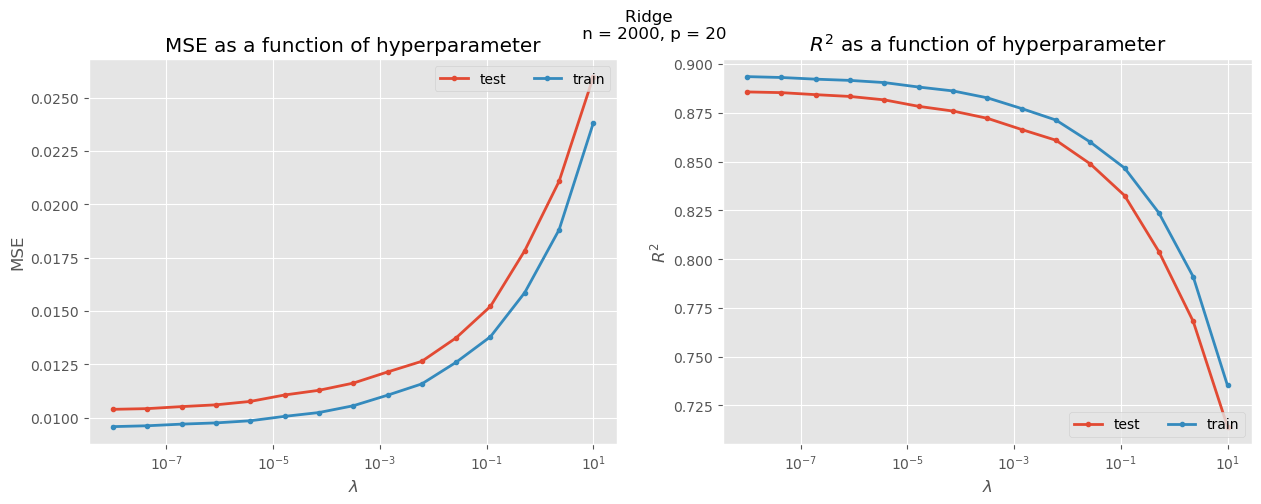

In [22]:
# MSE/R2 som funksjon av lambda

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')


ax[0].set_title('MSE as a function of hyperparameter')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('MSE')

ax[1].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of hyperparameter')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_xscale('log')
ax[1].set_xscale('log')

fig.suptitle(f'Ridge \n n = {n}, p = {p}')

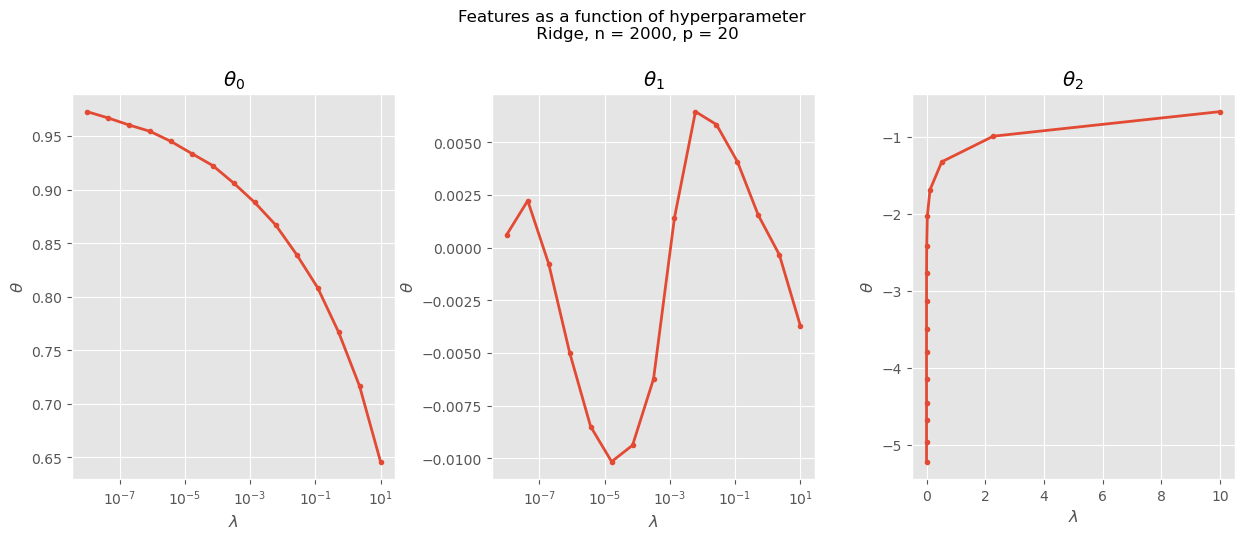

In [23]:
# Theta 1, 2, 3 som funksjon av lambda

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

ax[0].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2')
ax[1].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2')
ax[2].plot(df_Ridge_lambdas['lambda'], df_Ridge_lambdas['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of hyperparameter \n Ridge, n = {n}, p = {p}', y=1.05)

for axs in ax:
    axs.set_xlabel(r'$\lambda$')
    axs.set_ylabel(r'$\theta$')

ax[0].set_xscale('log')
ax[1].set_xscale('log')

### Checking the dependence on polynomial degree

In [24]:
n = 2000
l = 1e-4

p_vals = np.arange(2, 100, 5)

In [25]:
def Ridge_various_poly_deg(n, l, p_vals):
    
    results = []

    train, test, full = make_data(n)  # making a dataset with size n
    x_train, y_train = train
    x_test, y_test = test
    x_all, y_all, y_all_clean = full

    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    x_all = x_all.reshape(-1, 1)


    for p in p_vals:
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        Ridge(alpha=l, fit_intercept=False)
        )
        
        model.fit(x_train, y_train)
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)

        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)

        theta = model.named_steps['ridge'].coef_

        results.append({
            'p': p, 
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_Ridge = pd.DataFrame(results)
    return df_Ridge

In [26]:
df_Ridge_degs = Ridge_various_poly_deg(n, l, p_vals)

Text(0.5, 0.98, 'OLS and Ridge \\\\n = 2000, $\\lambda$=1.00e-04')

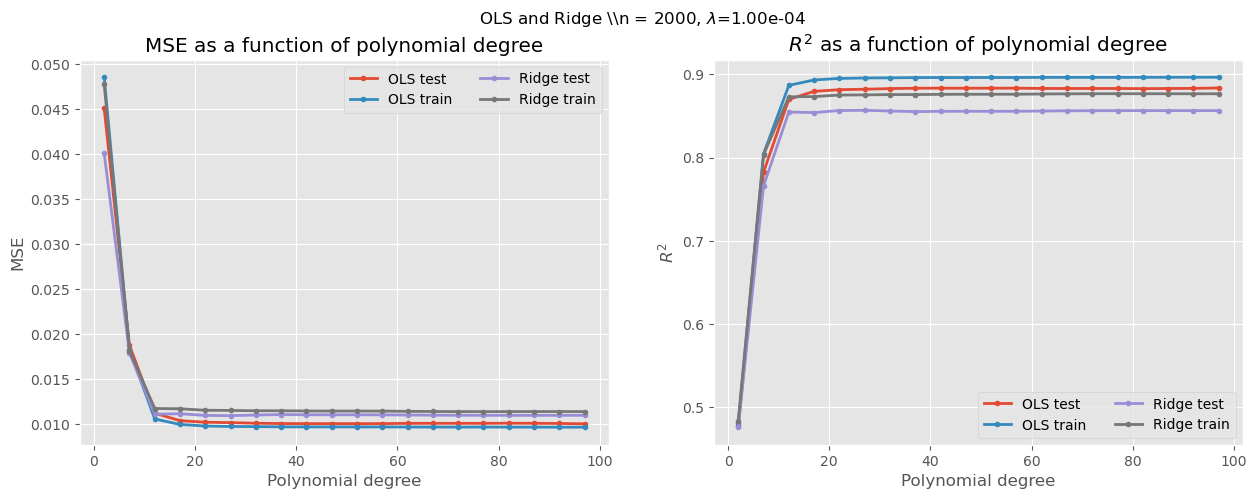

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='OLS test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='OLS train')

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='Ridge test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='Ridge train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'OLS test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'OLS train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'Ridge test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'Ridge train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(rf'OLS and Ridge \\n = {n}, $\lambda$={l:.2e}')

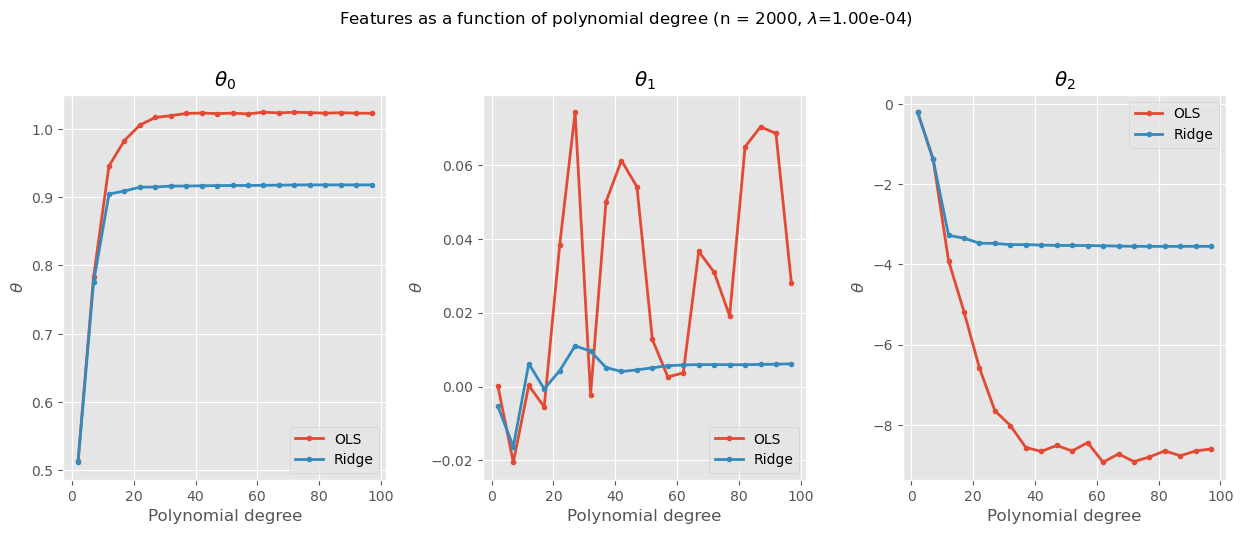

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', label='OLS')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', label='OLS')
ax[2].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', label='OLS')


ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', label='Ridge')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', label='Ridge')
ax[2].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', label='Ridge')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(rf'Features as a function of polynomial degree (n = {n}, $\lambda$={l:.2e})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')
    axs.legend()